# Практика

Необходимо предсказать биологический ответ молекул (столбец 'Activity') по их химическому составу (столбцы D1-D1776).

In [1]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные моделиё
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

import warnings
warnings.simplefilter('ignore',FutureWarning)
warnings.simplefilter('ignore',UserWarning)

%matplotlib inline
plt.style.use('seaborn-v0_8')

In [133]:
#Загружаем данные
data = pd.read_csv('data/_train_sem09 (1).csv')
display(data.head())

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


Так как предварительная обработка не требуется, пропускаем этот этап.

Смотрим на сбалансированность классов:

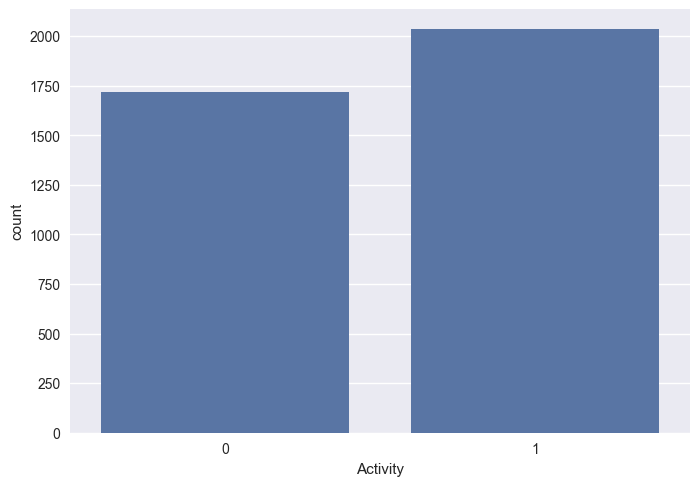

In [134]:
sns.countplot(data=data, x='Activity');

Создаем матрицу наблюдений $X$ и вектор ответов $y$.

In [135]:
X = data.drop(['Activity'], axis=1)
y = data['Activity']

Разделяем выборку на тренировочную и тестовую в соотношении 80/20. Для сохранения соотношений целевого признака используем параметр stratify (стратифицированное разбиение). 

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

### **Логистическая регрессия** 

In [60]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(max_iter=500, random_state=42)

#Обучаем модель
log_reg.fit(X_train, y_train)

#Делаем предсказание f1-score на тренировочной и тестовой выборках
y_train_pred = log_reg.predict(X_train)
print('f1_score на тренировочной выборке: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = log_reg.predict(X_test)
print('f1_score на тестовой выборке: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тренировочной выборке: 0.89
f1_score на тестовой выборке: 0.78


### GridSearchSV для логистической регрессии

In [137]:
#Импортируем библиотеку 
from sklearn.model_selection import GridSearchCV

In [62]:
#Указываем искомые гиперпараметры в виде словаря 
param_grid = [
    {'penalty': ['l2', 'none'], #тип регуляризации
     'solver': ['lbfgs', 'sag'], #алгоритм оптимизации
     'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}, #уровень силы регуляризации
    {'penalty': ['l1', 'l2'],
     'solver': ['liblinear', 'saga'],
     'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}
]

#Вызываем класс GridSearchCV
grid_search_log_reg = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv = 5,
    n_jobs = -1
)

# %time - замер времени
%time grid_search_log_reg.fit(X_train, y_train)

#Делаем предсказание
y_test_pred = grid_search_log_reg.predict(X_test)

#Выводим наилучшую найденную комбинацию гиперпараметров и метрику
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('Наилучшие значения гиперпараметров: {}'.format(grid_search_log_reg.best_params_))


c:\Program Files (x86)\Python\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
70 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "c:\Program Files (x86)

CPU times: total: 3.11 s
Wall time: 5min 23s
f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'C': 0.3, 'penalty': 'l1', 'solver': 'liblinear'}


При помощи GridSearchCV не удалось улучшить целевую метрику на тествой выборке.

### RandomizedSearchCV для логистической регрессии


In [138]:
#Импортируем библиотеку
from sklearn.model_selection import RandomizedSearchCV

In [64]:
#Указываем искомые гиперпараметры в виде словаря 
param_distributions = [{'penalty': ['l2', 'none'],
                       'solver': ['lbfgs', 'sag'],
                       'C': list(np.linspace(0.01, 1, 10, dtype=float))},
                       {'penalty': ['l1', 'l2'],
                        'solver': ['liblinear', 'saga'],
                        'C': list(np.linspace(0.01, 1, 10, dtype=float))}
                       ]

#Вызываем класс RandomizedSearchCV
random_search_log_reg = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_distributions,
    cv = 5,
    n_iter = 50,
    n_jobs = -1 
)

%time random_search_log_reg.fit(X_train, y_train)

#Делаем предсказание
y_test_pred = random_search_log_reg.predict(X_test)

#Выводим наилучшую найденную комбинацию гиперпараметров и метрику
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('Наилучшие значения гиперпараметров: {}'.format(random_search_log_reg.best_params_))

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "c:\Program Files (x86)

CPU times: total: 39.6 s
Wall time: 5min 46s
f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'solver': 'saga', 'penalty': 'l1', 'C': 0.23}


c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


При помощи RandomizedSearchCV не удалось улучшить целевую метрику на тествой выборке. Но данный метод отработал быстрее, чем GridSearchCV. (Но не всегда быстрее отрабатывает).

### HYPEROPT для логистической регрессии

In [139]:
#Импортируем библиотеки
import hyperopt
from hyperopt import hp, fmin, tpe, Trials
from sklearn.model_selection import cross_val_score

In [108]:
#Указываем искомые гиперпараметры в виде словаря 
space = {'penalty': hp.choice('penalty', ['l2', None]),
          'solver': hp.choice('solver', ['lbfgs', 'sag']),
          'C': hp.uniform('C', 0.01, 1)}

#Зафиксируем random_state
random_state = 42
#Пишем функцию hyperopt
def hyperopt_log_reg(params, cv=5, X=X_train,
                     y=y_train, random_state=random_state):
    #Функция получает комбинацию гиперпараметов в params
    params = {'penalty': params['penalty'],
              'solver': params['solver'],
              'C': float(params['C'])
              }
    
    #Используем эту комбинацию для построения модели
    model = linear_model.LogisticRegression(**params, random_state=random_state)

    #Обучим модель с помощью кросс-валидации
    model.fit(X, y)
    score = cross_val_score(model, X, y, cv=cv, scoring='f1', n_jobs=-1).mean()

    return -score

%time
#Начинаем подбор гиперпараметров

#Используется для логирования результатов
trials = Trials()

best = fmin(hyperopt_log_reg,#наша функция
            space=space,#пространство гиперпараметров
            algo=tpe.suggest,#алгоритм оптимизации, 
            #установлен по умолчанию, задавать необязательно
            max_evals=25,#максимальное количество итераций
            trials=trials,#логирование результатов
            rstate=np.random.default_rng(random_state)
            #фиксируем для повторяемости результата
            )

print('Наилучшие значения гиперпараметров {}'.format(best))

CPU times: total: 0 ns
Wall time: 0 ns
  0%|          | 0/25 [00:00<?, ?trial/s, best loss=?]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



  4%|▍         | 1/25 [00:02<00:57,  2.39s/trial, best loss: -0.7515816136471943]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  8%|▊         | 2/25 [00:10<02:06,  5.50s/trial, best loss: -0.7802155861598277]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 12%|█▏        | 3/25 [00:12<01:28,  4.02s/trial, best loss: -0.7880614801082855]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 16%|█▌        | 4/25 [00:20<01:54,  5.46s/trial, best loss: -0.7880614801082855]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 20%|██        | 5/25 [00:22<01:27,  4.35s/trial, best loss: -0.7880614801082855]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 24%|██▍       | 6/25 [00:30<01:47,  5.65s/trial, best loss: -0.7880614801082855]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 28%|██▊       | 7/25 [00:38<01:55,  6.43s/trial, best loss: -0.7880614801082855]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 32%|███▏      | 8/25 [00:41<01:29,  5.24s/trial, best loss: -0.7880614801082855]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 36%|███▌      | 9/25 [00:43<01:10,  4.38s/trial, best loss: -0.7880614801082855]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 44%|████▍     | 11/25 [00:54<01:03,  4.55s/trial, best loss: -0.7898377171380607]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 48%|████▊     | 12/25 [01:03<01:16,  5.86s/trial, best loss: -0.7898377171380607]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 52%|█████▏    | 13/25 [01:05<00:57,  4.78s/trial, best loss: -0.7898377171380607]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 56%|█████▌    | 14/25 [01:13<01:03,  5.77s/trial, best loss: -0.7898377171380607]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 60%|██████    | 15/25 [01:21<01:03,  6.40s/trial, best loss: -0.7898377171380607]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 64%|██████▍   | 16/25 [01:23<00:46,  5.22s/trial, best loss: -0.7898377171380607]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 68%|██████▊   | 17/25 [01:32<00:49,  6.23s/trial, best loss: -0.7898377171380607]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 72%|███████▏  | 18/25 [01:40<00:47,  6.80s/trial, best loss: -0.7898377171380607]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 76%|███████▌  | 19/25 [01:48<00:42,  7.13s/trial, best loss: -0.7898377171380607]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 80%|████████  | 20/25 [01:50<00:28,  5.72s/trial, best loss: -0.7898377171380607]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 84%|████████▍ | 21/25 [01:53<00:19,  4.79s/trial, best loss: -0.7898377171380607]

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 92%|█████████▏| 23/25 [01:58<00:06,  3.49s/trial, best loss: -0.794911910450625] 

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



100%|██████████| 25/25 [02:02<00:00,  4.91s/trial, best loss: -0.794911910450625]
Наилучшие значения гиперпараметров {'C': 0.017331323696411022, 'penalty': 0, 'solver': 0}


In [112]:
#Преобразуем best в параметры модели
penalty_options = ['l2', None]
solver_options = ['lbfgs', 'sag']

best_params = {
    'penalty':penalty_options[best['penalty']],
    'solver':solver_options[best['solver']],
    'C':float(best['C'])
}

#Рассчитам точность для тестовой выборки
model_hyperopt_log_reg = linear_model.LogisticRegression(
    random_state=random_state,
    **best_params
    )

model_hyperopt_log_reg.fit(X_train, y_train)

#Делаем предсказание
y_test_pred = model_hyperopt_log_reg.predict(X_test)

#Выводим наилучшую найденную комбинацию гиперпараметров и метрику
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.78


На подборе гиперпараметров можно наблюдать значения -0.7949..., что говорит о том, что значение f1_score должно быть 0.79 - 0.8. Но после обучения модели с наилучшими гиперпараметрами метрика осталась неизменной. Но данный метод, подобрал гиперпараметры быстрее, чем два предыдущих.

### Optuna для логистической регрессии

In [140]:
#Импортируем библиотеку
import optuna

In [ ]:
#Настроим пространства поиска гиперпараметров
def optuna_log_reg(trial):
    #Задаем пространства поиска гиперпараметров
    penalty = trial.suggest_categorical('penalty', ['l2', None])
    solver = trial.suggest_categorical('solver', ['lbfgs', 'sag'])
    C = trial.suggest_float('C', 0.01, 1)

    #Создаем модель
    model = linear_model.LogisticRegression(penalty=penalty,
                                            solver=solver,
                                            C=C,
                                            random_state=random_state)
    
    #Обучаем модель
    model.fit(X_train, y_train)
    score = metrics.f1_score(y_train, model.predict(X_train))
    
    return score

%%time
#Создаем объект исследования
#Можем напрямую указать, что нам необходимо максимизировать метрику
#direction='maximize'
study = optuna.create_study(study_name='LogisticRegression', direction='maximize')
#Ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_log_reg, n_trials=20)

In [123]:
#Выводим результаты на обучающей выборке
print('Наилучшие значения гиперпараметров {}'.format(study.best_params))
print('f1_score на обучающем наборе: {:.2f}'.format(study.best_value))

Наилучшие значения гиперпараметров {'penalty': None, 'solver': 'lbfgs', 'C': 0.7626773974941944}
f1_score на обучающем наборе: 0.91


In [ ]:
#Рассчитаем точность для тестовой выборки
model_optuna_log_reg = linear_model.LogisticRegression(**study.best_params, random_state=random_state)

model_optuna_log_reg.fit(X_train, y_train)

y_test_pred = model_optuna_log_reg.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


f1_score на тестовом наборе: 0.76


c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


К сожалению, Optuna показала ухудшение результата. Но подбор гиперпараметров отработал быстрее всего.

### **Случайный лес** 

In [141]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(random_state=42)

#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики
y_train_pred = rf.predict(X_train)
print('f1_score на тренировочной выборке: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('f1_score на тестовой выборке: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тренировочной выборке: 1.00
f1_score на тестовой выборке: 0.81


### GridSearchSV для случайного леса

In [142]:
param_grid = {'n_estimators': list(range(80, 200, 30)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5, 
    n_jobs=-1
)

%time grid_search_rf.fit(X_train, y_train)

y_test_pred = grid_search_rf.predict(X_test)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('Наилучшие значения гиперпараметров: {}'.format(grid_search_rf.best_params_))

CPU times: total: 19.1 s
Wall time: 1min 24s
f1_score на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 170}


Улучшить результат при помощи GridSearchSV к сожалению не удалось. Это говорит о том, что стандартные гиперпараметры были достаточно хороши.

### RandomizedSearchCV для случайного леса

In [143]:
param_distributions = {'n_estimators': list(range(80, 200, 30)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }

#Вызываем класс RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    cv = 5,
    n_iter = 20,
    n_jobs = -1 
)

%time random_search_rf.fit(X_train, y_train)

#Делаем предсказание
y_test_pred = random_search_rf.predict(X_test)

#Выводим наилучшую найденную комбинацию гиперпараметров и метрику
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('Наилучшие значения гиперпараметров: {}'.format(random_search_rf.best_params_))

CPU times: total: 10.7 s
Wall time: 32 s
f1_score на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'n_estimators': 170, 'min_samples_leaf': 5, 'max_depth': 20}


При помощи RandomizedSearchCV результат так же не изменился, но код отработал быстрее примерно в 3 раза.

### HYPEROPT для случайного леса

In [153]:
#Зададим пространство поиска гиперпараметров
space = {'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
         'max_depth': hp.quniform('max_depth', 15, 26, 1),
         'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 10, 1)
         }

#Зафиксируем random_state
random_state = 42
def hyperopt_rf(params, cv=5, X=X_train, 
                y=y_train, random_state=random_state):
    #Функция получает комбинацию гиперпараметров в params
    params= {'n_estimators': int(params['n_estimators']),
             'max_depth': int(params['max_depth']),
             'min_samples_leaf': int(params['min_samples_leaf'])
             }
    
    #Используем эту комбинацию для построения модели
    model = ensemble.RandomForestClassifier(**params, random_state=random_state)
    
    #Обучаем модель 
    model.fit(X, y)
    score = cross_val_score(model, X, y, cv=cv, scoring='f1', n_jobs=-1).mean()
    
    #Метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

%time
#Начинаем подбор гиперпараметров

#Используется для логирования результатов
trials = Trials()

best = fmin(hyperopt_rf,#наша функция
            space=space,#пространство гиперпараметров
            algo=tpe.suggest,#алгоритм оптимизации, 
            #установлен по умолчанию, задавать необязательно
            max_evals=20,#максимальное количество итераций
            trials=trials,#логирование результатов
            rstate=np.random.default_rng(random_state)
            #фиксируем для повторяемости результата
            )

print('Наилучшие значения гиперпараметров {}'.format(best))

CPU times: total: 0 ns
Wall time: 0 ns
100%|██████████| 20/20 [01:20<00:00,  4.01s/trial, best loss: -0.8149864795387675]
Наилучшие значения гиперпараметров {'max_depth': 18.0, 'min_samples_leaf': 2.0, 'n_estimators': 103.0}


In [154]:
#Расчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(
    random_state=random_state,
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_leaf=int(best['min_samples_leaf'])
)

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.81


Hyperopt также не дал лучших показателей, как и предыдущие методы.

### Optuna для случайного леса

In [156]:
def optuna_rf(trial):
    #Задаем пространства поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
    
    #Создаем модель
    model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf,
                                            random_state=random_state)
    
    #Обучаем модель
    model.fit(X_train, y_train)
    score = metrics.f1_score(y_train, model.predict(X_train))
    
    return score

%time
#Создаем объект исследования
#Можем напрямую указать, что нам необходимо максимизировать метрику
#direction='maximize'
study = optuna.create_study(study_name='RandomForestClassifier', direction='maximize')
#Ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2025-11-02 18:01:23,036] A new study created in memory with name: RandomForestClassifier


CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\Андрей\AppData\Local\Temp\ipykernel_15660\482804858.py:3: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
C:\Users\Андрей\AppData\Local\Temp\ipykernel_15660\482804858.py:4: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. 

In [157]:
#Выводим результаты на обучающей выборке
print('Наилучшие значения гиперпараметров {}'.format(study.best_params))
print('f1_score на обучающем наборе: {:.2f}'.format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 119, 'max_depth': 24, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.99


In [159]:
#Рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params, random_state=random_state)

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.80


К сожалению, метод Optuna ухудшил результаты. Код отработал быстрее Hyperopt.

## *Вывод*

Исходя из вышепредставленных результатов, можно сделать вывод, что базовые гиперпараметры для данной выборки были оптимальными. Следовательно, дополнительный подбор гиперпараметров был не обязателен.